## Library

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## Commodity

In [2]:
gold = yf.download('GC=F',start="2023-01-01", end = '2024-6-30')
# Metal
silver = yf.download('SI=F', start="2023-01-01", end = '2024-6-30')
Platinum = yf.download('PL=F',start="2023-01-01", end = '2024-6-30')
# agriculture
wheat = yf.download("ZW=F", start="2023-01-01", end = '2024-6-30') # CBOT Wheat
oil = yf.download('CL=F',  start="2023-01-01", end = '2024-6-30')
commodity = [gold,silver,Platinum,wheat,oil]
labels = ['Gold', 'Silver', 'Platinum', 'Wheat', 'Oil']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
def daily_return(commodity):
    for i in commodity:
        i['Return'] = i['Adj Close'].pct_change()

def data_info(commodity,labels):
    for i in range(len(commodity)):
        print(labels[i] + "'s information")
        print(commodity[i].info())
        print(labels[i] + "'s Statistics Summary")
        print(commodity[i].describe())


In [4]:
daily_return(commodity)

In [6]:
data_info(commodity,labels)

Gold's information
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 2023-01-03 to 2024-06-28
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       374 non-null    float64
 1   High       374 non-null    float64
 2   Low        374 non-null    float64
 3   Close      374 non-null    float64
 4   Adj Close  374 non-null    float64
 5   Volume     374 non-null    int64  
 6   Return     373 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 23.4 KB
None
Gold's Statistics Summary
              Open         High          Low        Close    Adj Close  \
count   374.000000   374.000000   374.000000   374.000000   374.000000   
mean   2029.855879  2038.940909  2021.406418  2030.019513  2030.019513   
std     156.413643   158.982415   154.279773   156.831157   156.831157   
min    1808.099976  1808.800049  1808.099976  1808.800049  1808.800049   
25%    1924.324982  1931.549988  1920.000000  

### EDA (Commodity)

In [19]:
def plot_histograms(commodity_list, labels,target):
    """
    Plots histograms of 'Adj Close' prices for each commodity in the provided list.

    Parameters:
    commodity_list: List of DataFrames
    labels: List of names corresponding to the commodities
    """
    num_commodities = len(commodity_list)
    
    # Set up the figure and subplots
    fig, axes = plt.subplots(num_commodities, 1, figsize=(10, 4*num_commodities))
    fig.tight_layout(pad=3.0)  # Adding space between plots
    
    # If there's only one commodity, axes will not be a list, so we need to handle that
    if num_commodities == 1:
        axes = [axes]
    
    # Iterate through the commodity data and plot histograms

    for i, df in enumerate(commodity_list):
        axes[i].hist(df[target], bins=50, color='blue', edgecolor='black')
        axes[i].set_title(f'Histogram of {labels[i]} Return')
        axes[i].set_xlabel('Price ($)')
        axes[i].set_ylabel('Frequency')
    
    plt.show()
        

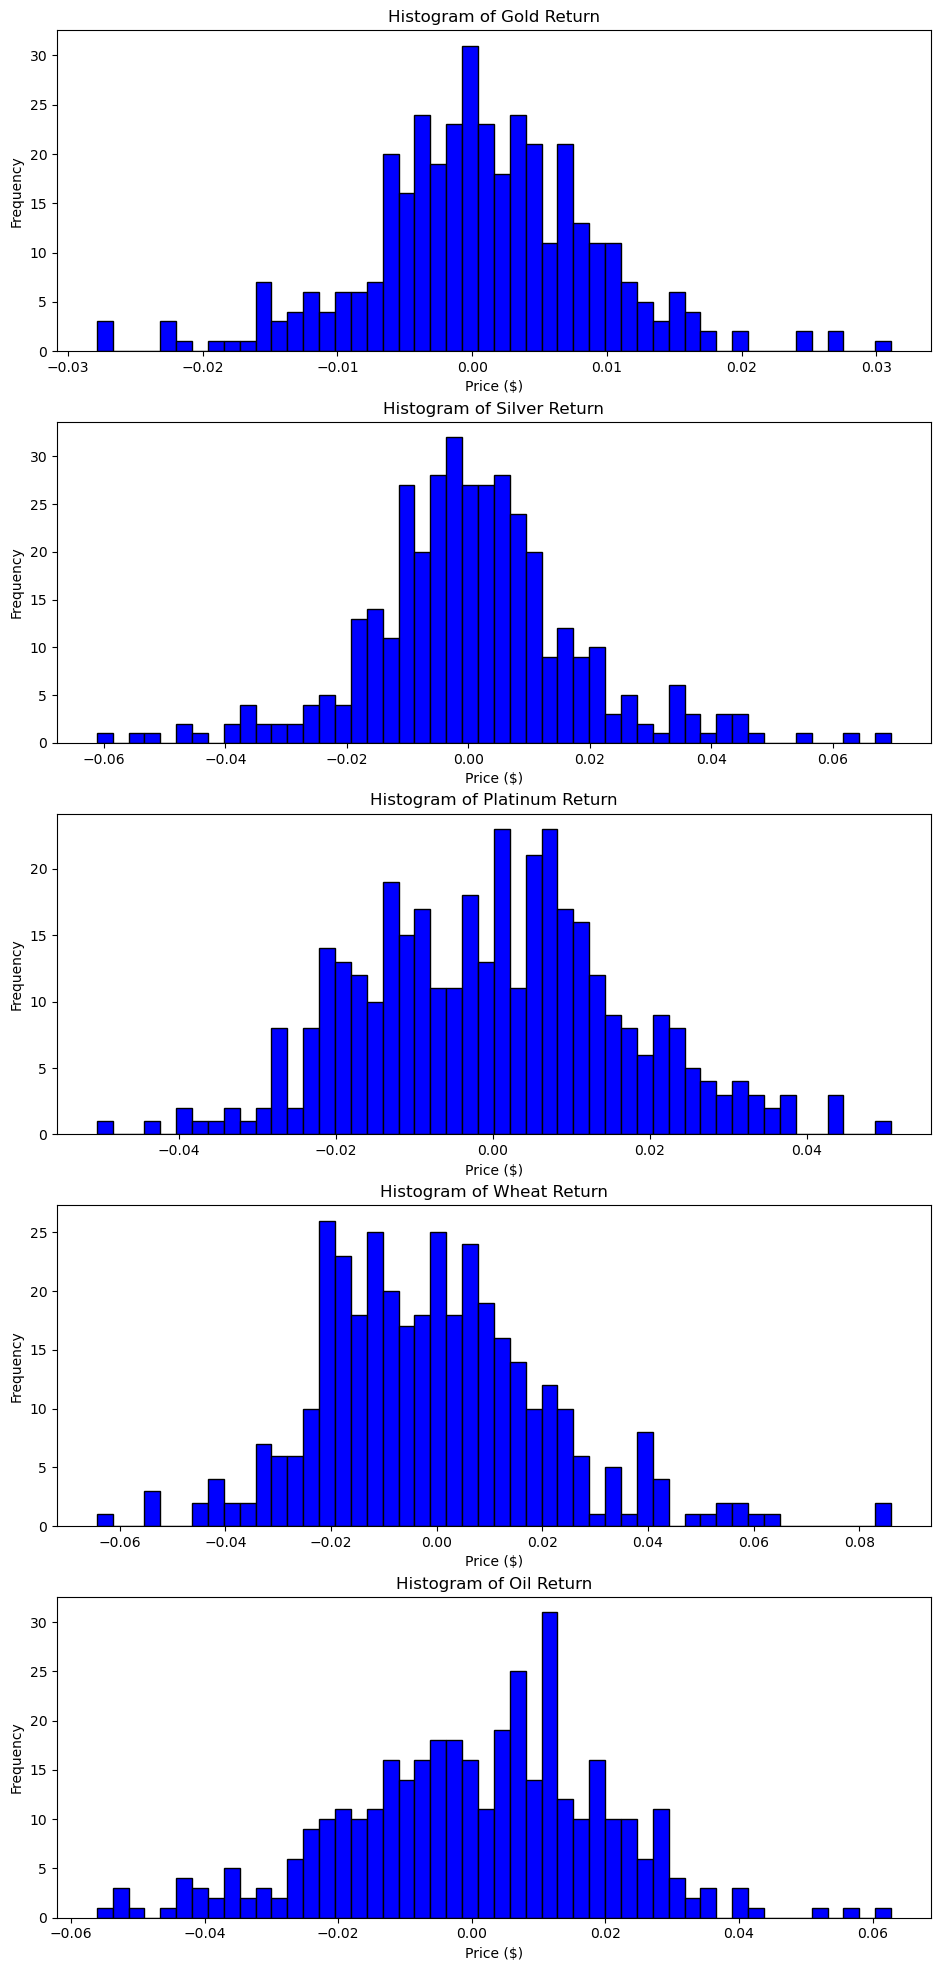

In [20]:

plot_histograms(commodity, labels, "Return")

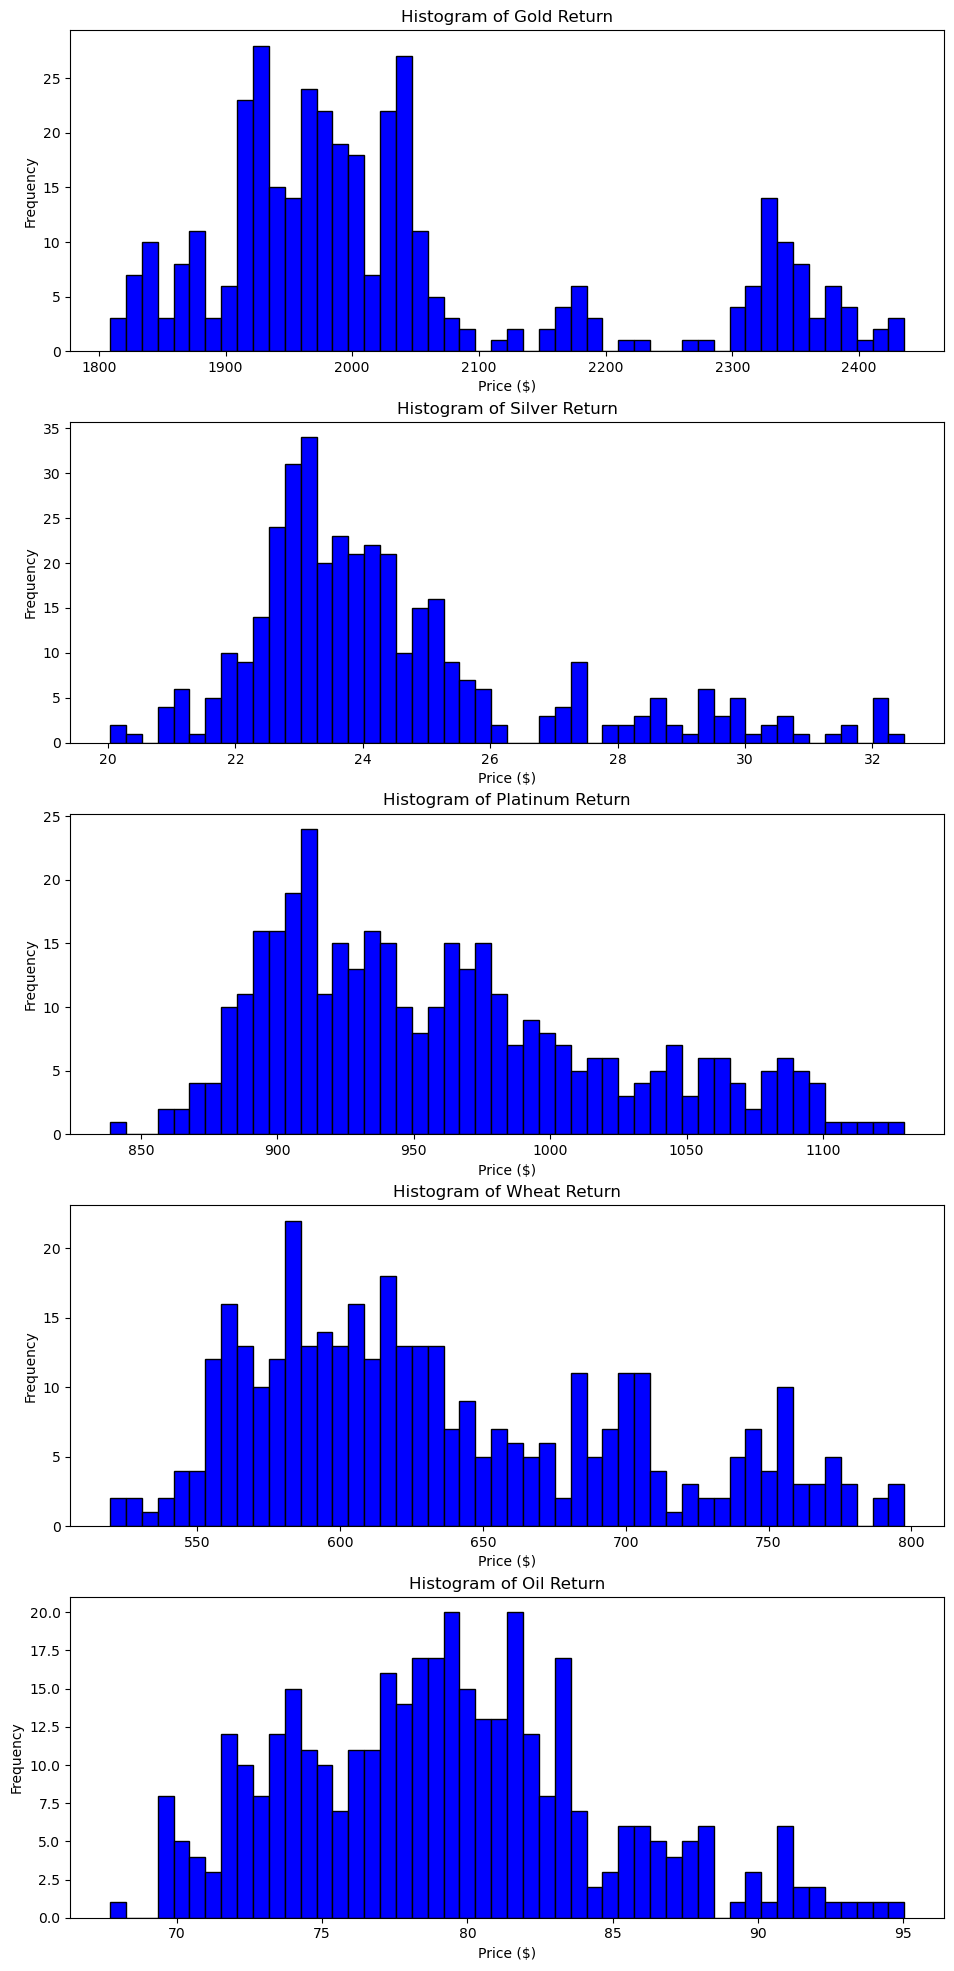

In [21]:

plot_histograms(commodity, labels, "High")

In [22]:
## Adj Close Price
def plot_target(target):
    fig, ax = plt.subplots(5, 1, figsize=(10, 20))  # 5 rows, 1 column for vertical layout

    fontsize = 10

    # Gold
    ax[0].plot(gold[target])
    ax[0].set_title('Gold', fontsize=fontsize)
    ax[0].set_xlabel('Date', fontsize=fontsize)
    ax[0].set_ylabel('Price($)', fontsize=fontsize)

    # Silver
    ax[1].plot(silver[target])
    ax[1].set_title('Silver', fontsize=fontsize)
    ax[1].set_xlabel('Date', fontsize=fontsize)
    ax[1].set_ylabel('Price($)', fontsize=fontsize)

    # Platinum
    ax[2].plot(Platinum[target])
    ax[2].set_title('Platinum', fontsize=fontsize)
    ax[2].set_xlabel('Date', fontsize=fontsize)
    ax[2].set_ylabel('Price($)', fontsize=fontsize)

    # Wheat
    ax[3].plot(wheat[target])
    ax[3].set_title('Wheat', fontsize=fontsize)
    ax[3].set_xlabel('Date', fontsize=fontsize)
    ax[3].set_ylabel('Price($)', fontsize=fontsize)

    # Oil
    ax[4].plot(oil[target])
    ax[4].set_title('Oil', fontsize=fontsize)
    ax[4].set_xlabel('Date', fontsize=fontsize)
    ax[4].set_ylabel('Price($)', fontsize=fontsize)

    # Main title

    plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=2)  # h_pad adds space between rows
    plt.show()

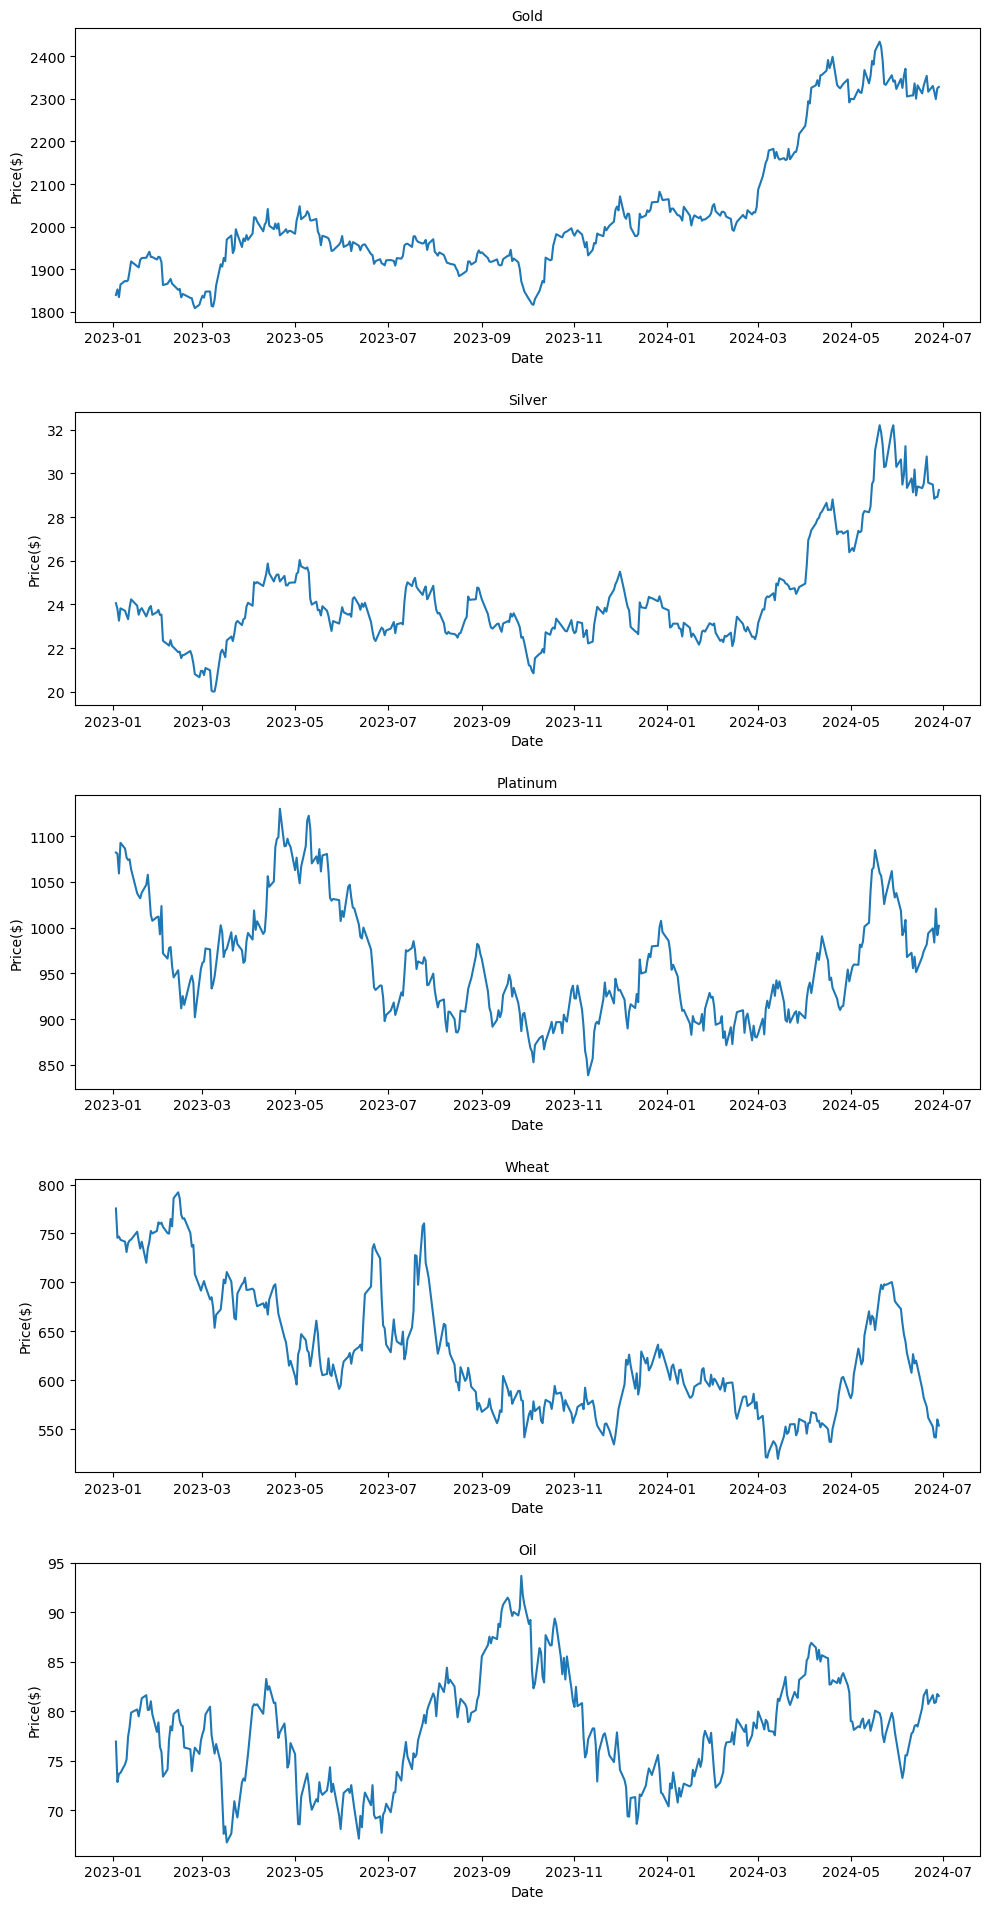

In [23]:
plot_target("Adj Close")

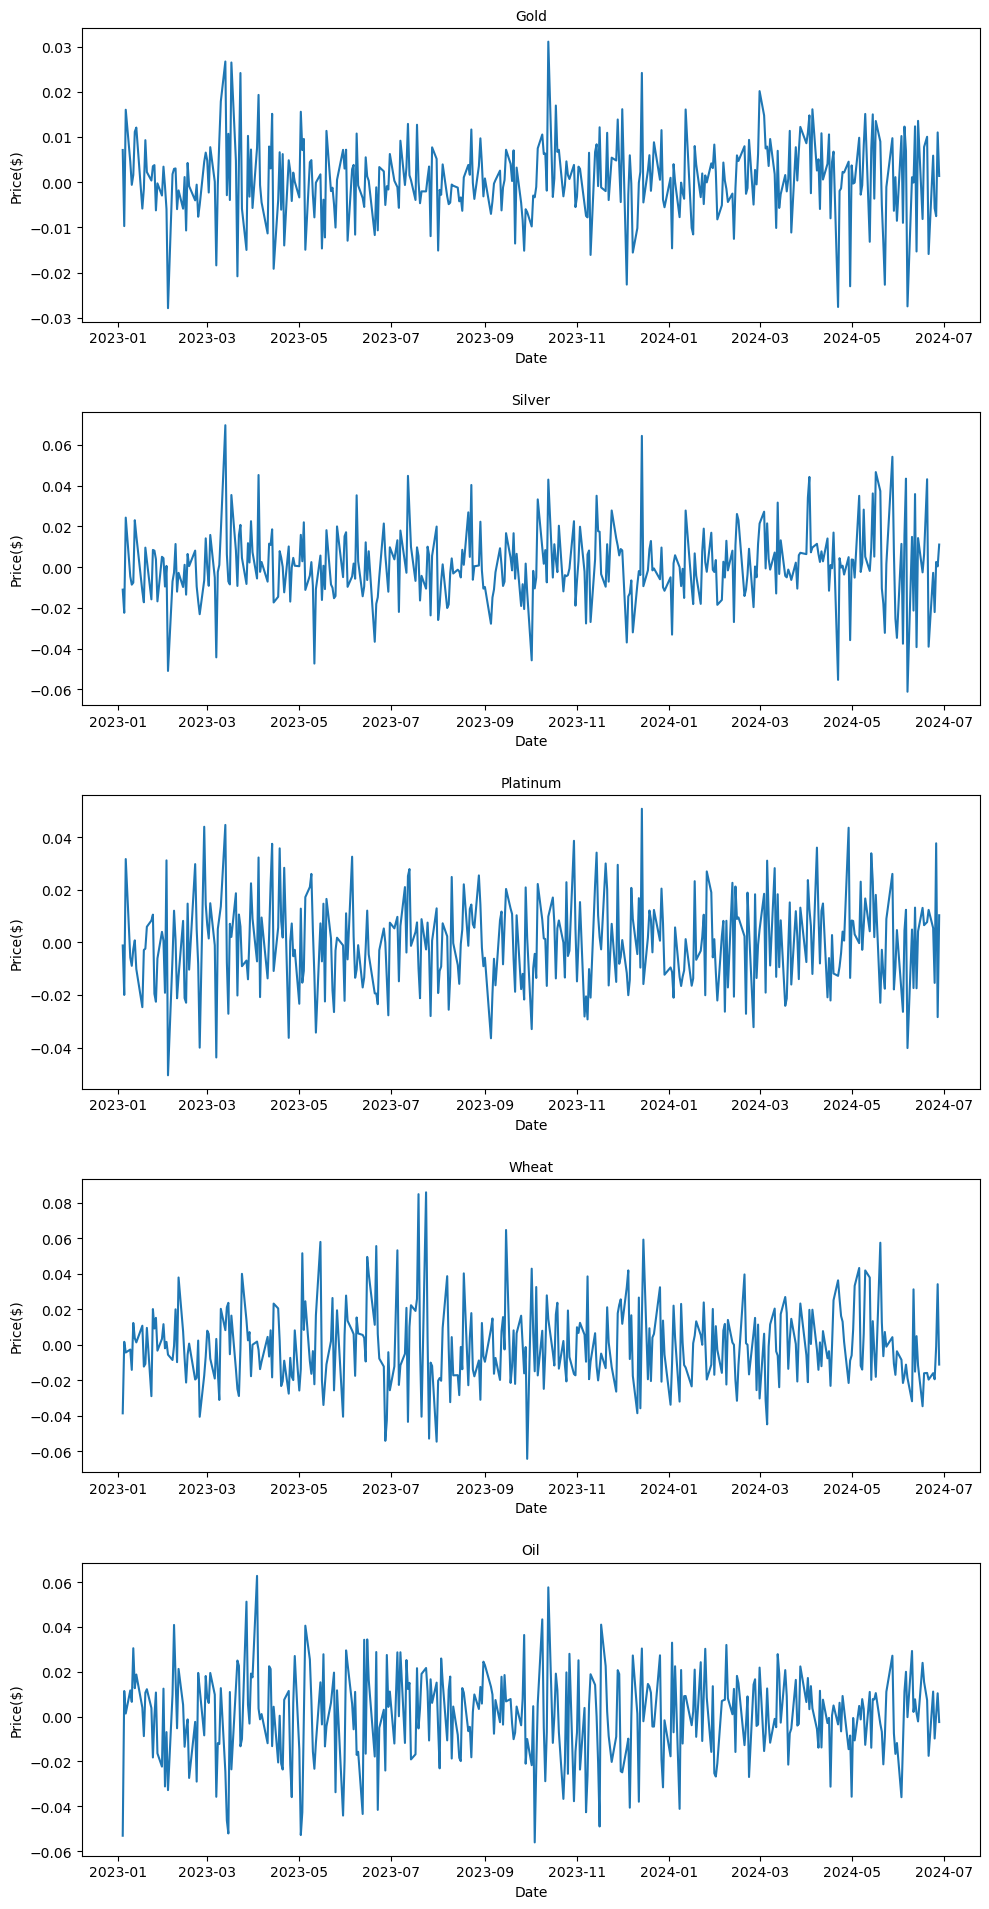

In [25]:
plot_target("Return")

In [17]:
def corr_matrix(commodity, labels):
     for i in range(len(labels)):
         corr_matrix = commodity[i].corr()
         sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
         # Title and labels
         plt.title(f'Correlation Heatmap of {labels[i]}', fontsize=15)

         plt.show()
         
         

#absolute

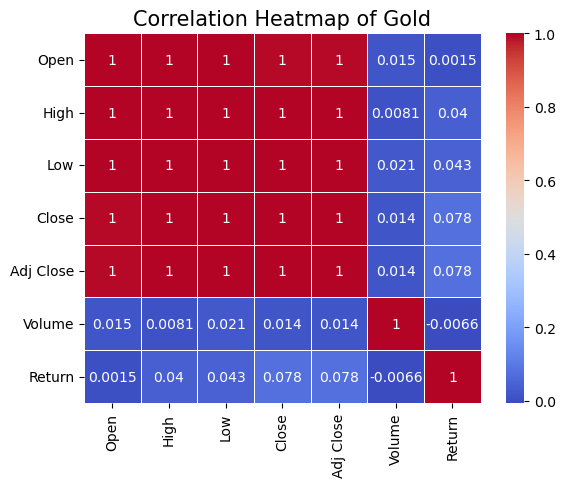

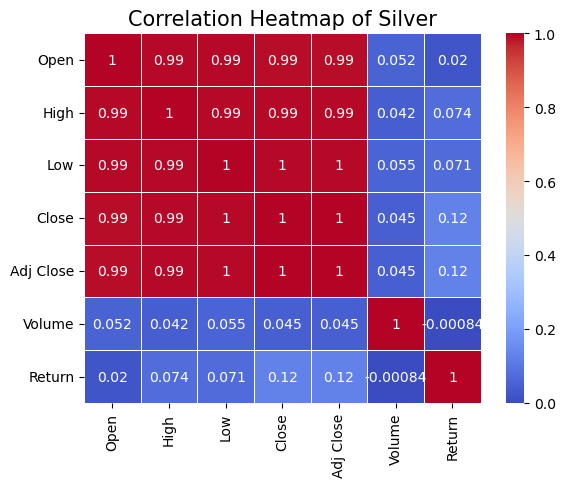

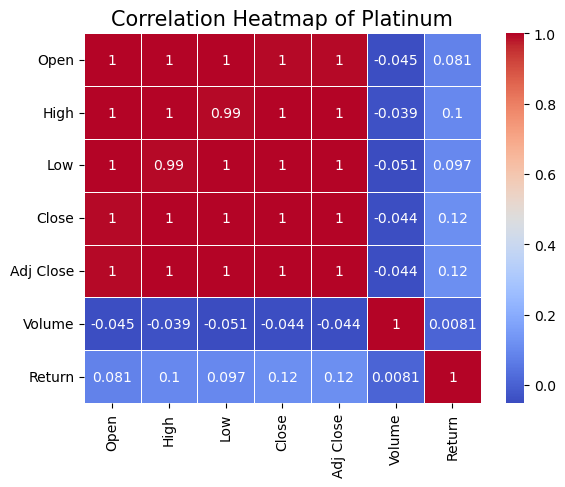

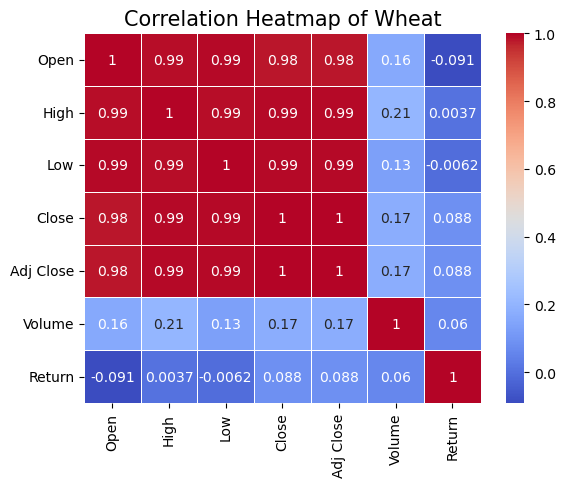

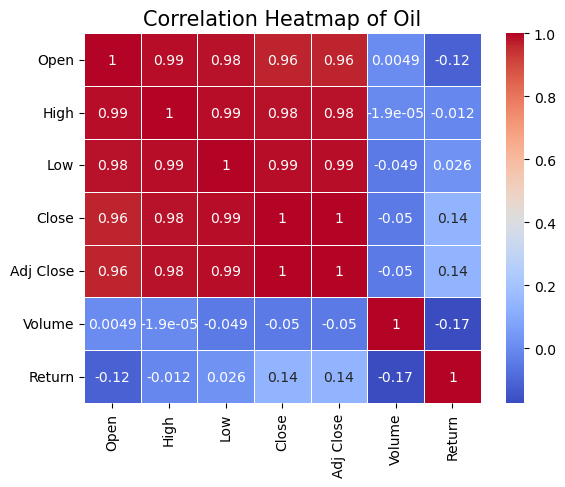

In [18]:
corr_matrix(commodity, labels)

# Equity (AAPL, TSLA)

In [9]:
equity_data = yf.download(["AAPL", "TSLA"], start="2023-01-01", end = '2024-6-30')

[*********************100%***********************]  2 of 2 completed


In [10]:
equity_data.head(5)

Price                       Adj Close                   Close              \
Ticker                           AAPL        TSLA        AAPL        TSLA   
Date                                                                        
2023-01-03 00:00:00+00:00  123.904633  108.099998  125.070000  108.099998   
2023-01-04 00:00:00+00:00  125.182610  113.639999  126.360001  113.639999   
2023-01-05 00:00:00+00:00  123.855087  110.339996  125.019997  110.339996   
2023-01-06 00:00:00+00:00  128.412231  113.059998  129.619995  113.059998   
2023-01-09 00:00:00+00:00  128.937271  119.769997  130.149994  119.769997   

Price                            High                     Low              \
Ticker                           AAPL        TSLA        AAPL        TSLA   
Date                                                                        
2023-01-03 00:00:00+00:00  130.899994  118.800003  124.169998  104.639999   
2023-01-04 00:00:00+00:00  128.660004  114.589996  125.080002  107.519997   
2023-01-05 00:00:00+00:00  127.769997  111.750000  124.760002  107.160004   
2023-01-06 00:00:00+00:00  130.289993  114.389999  124.889999  101.809998   
2023-01-09 00:00:00+00:00  133.410004  123.519997  129.889999  117.110001   

Price                            Open                 Volume             
Ticker                           AAPL        TSLA       AAPL       TSLA  
Date                                                                     
2023-01-03 00:00:00+00:00  130.279999  118.470001  112117500  231402800  
2023-01-04 00:00:00+00:00  126.889999  109.110001   89113600  180389000  
2023-01-05 00:00:00+00:00  127.129997  110.510002   80962700  157986300  
2023-01-06 00:00:00+00:00  126.010002  103.000000   87754700  220911100  
2023-01-09 00:00:00+00:00  130.470001  118.959999   70790800  190284000

In [11]:
equity_data.columns

MultiIndex([('Adj Close', 'AAPL'),
            ('Adj Close', 'TSLA'),
            (    'Close', 'AAPL'),
            (    'Close', 'TSLA'),
            (     'High', 'AAPL'),
            (     'High', 'TSLA'),
            (      'Low', 'AAPL'),
            (      'Low', 'TSLA'),
            (     'Open', 'AAPL'),
            (     'Open', 'TSLA'),
            (   'Volume', 'AAPL'),
            (   'Volume', 'TSLA')],
           names=['Price', 'Ticker'])

In [12]:
equity_data.columns = ['_'.join(col).strip() for col in equity_data.columns.values]

In [13]:
equity_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 374 entries, 2023-01-03 00:00:00+00:00 to 2024-06-28 00:00:00+00:00
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Adj Close_AAPL  374 non-null    float64
 1   Adj Close_TSLA  374 non-null    float64
 2   Close_AAPL      374 non-null    float64
 3   Close_TSLA      374 non-null    float64
 4   High_AAPL       374 non-null    float64
 5   High_TSLA       374 non-null    float64
 6   Low_AAPL        374 non-null    float64
 7   Low_TSLA        374 non-null    float64
 8   Open_AAPL       374 non-null    float64
 9   Open_TSLA       374 non-null    float64
 10  Volume_AAPL     374 non-null    int64  
 11  Volume_TSLA     374 non-null    int64  
dtypes: float64(10), int64(2)
memory usage: 38.0 KB


In [14]:
equity_data.describe()

,Adj Close_AAPL,Adj Close_TSLA,Close_AAPL,Close_TSLA,High_AAPL,High_TSLA,Low_AAPL,Low_TSLA,Open_AAPL,Open_TSLA,Volume_AAPL,Volume_TSLA
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,3.740000e+02,3.740000e+02
mean,175.543431,206.676845,176.410401,206.676845,177.841685,210.622888,174.842246,202.332005,176.205348,206.445428,6.120889e+07,1.233875e+08
std,17.033778,39.211797,16.850168,39.211797,16.954111,39.746311,16.912921,38.890505,17.025698,39.435998,2.293112e+07,3.868041e+07
min,123.855087,108.099998,125.019997,108.099998,127.769997,111.750000,124.169998,101.809998,126.010002,103.000000,2.404830e+07,5.086970e+07
25%,168.365822,177.542496,168.879997,177.542496,170.404999,180.582500,167.924995,173.847504,169.022503,177.235004,4.809562e+07,9.836542e+07
50%,176.964310,197.415001,177.970001,197.415001,179.454994,201.330002,176.529999,192.550003,177.450005,196.875000,5.493745e+07,1.171974e+08
75%,188.374725,242.527500,189.287502,242.527500,189.990005,246.637505,187.570004,237.760002,189.140003,242.445000,6.781028e+07,1.422097e+08
max,216.419495,293.339996,216.669998,293.339996,220.199997,299.290009,213.000000,289.519989,217.589996,296.040009,2.464214e+08,3.065906e+08


## Exploratory Data Analysis (Equity)

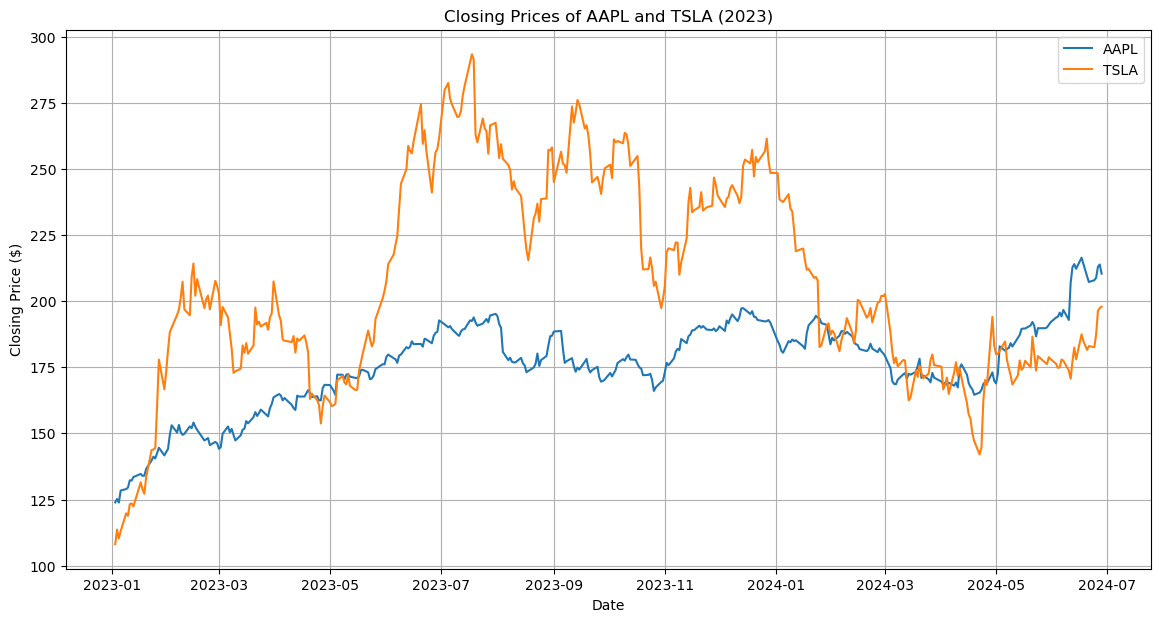

In [26]:
plt.figure(figsize=(14, 7))
plt.plot(equity_data.index, equity_data['Adj Close_AAPL'], label='AAPL')
plt.plot(equity_data.index, equity_data['Adj Close_TSLA'], label='TSLA')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.title('Closing Prices of AAPL and TSLA (2023)')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
equity_data['Return_AAPL'] = equity_data['Adj Close_AAPL'].pct_change()
equity_data['Return_TSLA'] = equity_data['Adj Close_TSLA'].pct_change()

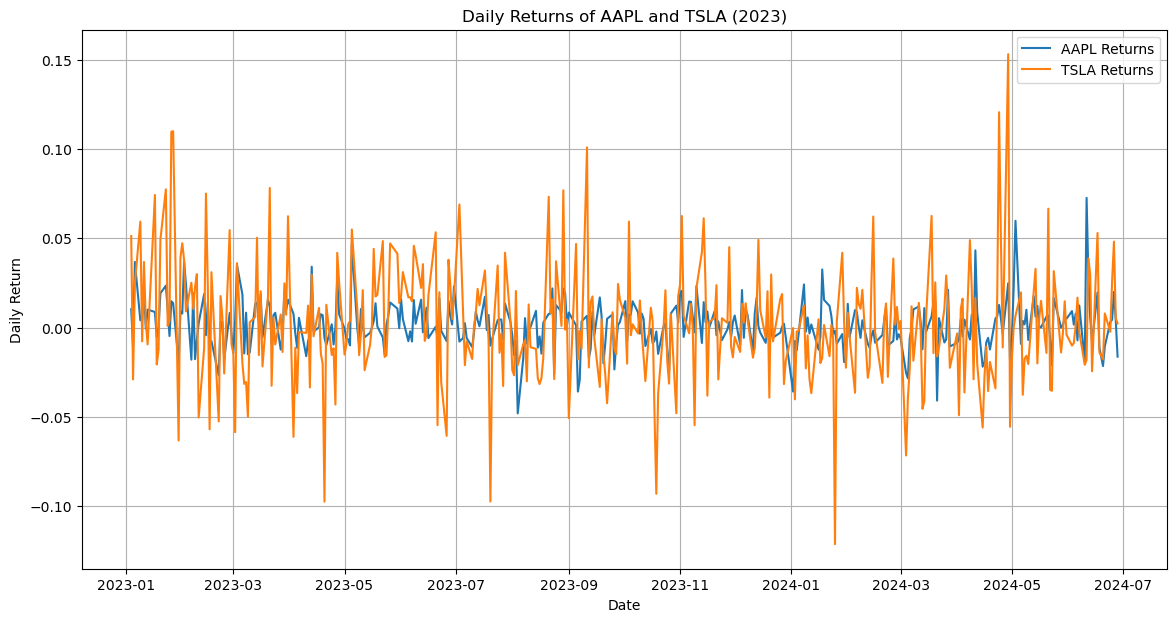

In [28]:
# Plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(equity_data.index, equity_data['Return_AAPL'], label='AAPL Returns')
plt.plot(equity_data.index, equity_data['Return_TSLA'], label='TSLA Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns of AAPL and TSLA (2023)')
plt.legend()
plt.grid(True)
plt.show()

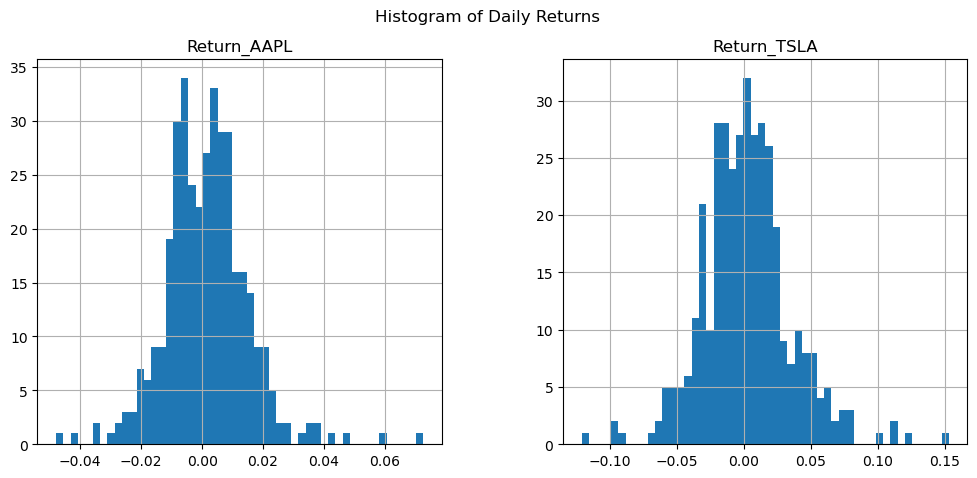

In [29]:
# Plot histograms
equity_data[['Return_AAPL', 'Return_TSLA']].hist(bins=50, figsize=(12, 5), layout=(1, 2))
plt.suptitle('Histogram of Daily Returns')
plt.show()

In [30]:
# Plot histograms
returns = equity_data[['Return_AAPL', 'Return_TSLA']]
corr_matrix = returns.corr()
print(corr_matrix)

             Return_AAPL  Return_TSLA
Return_AAPL     1.000000     0.397289
Return_TSLA     0.397289     1.000000


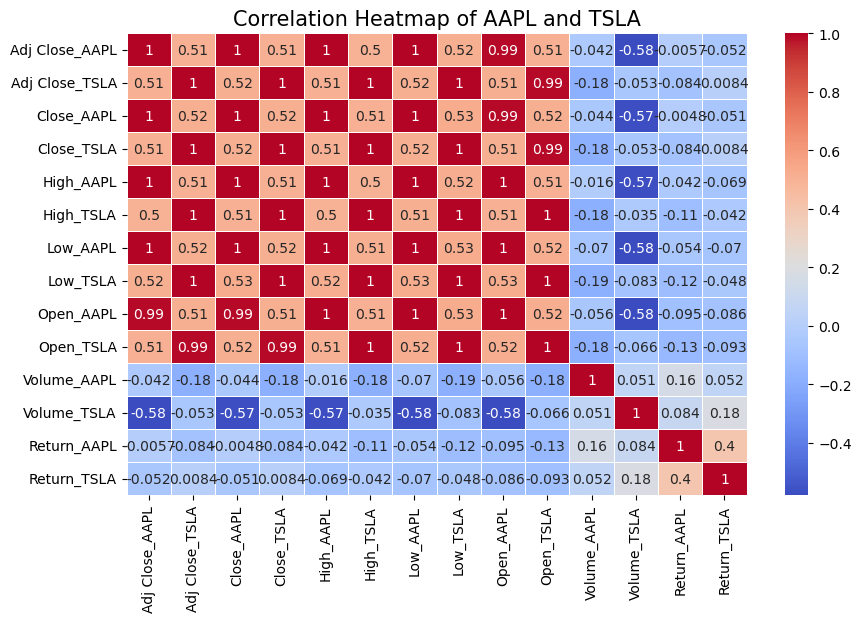

In [31]:
corr_matrix = equity_data.corr()

# Step 2: Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Title and labels
plt.title('Correlation Heatmap of AAPL and TSLA', fontsize=15)
plt.show()

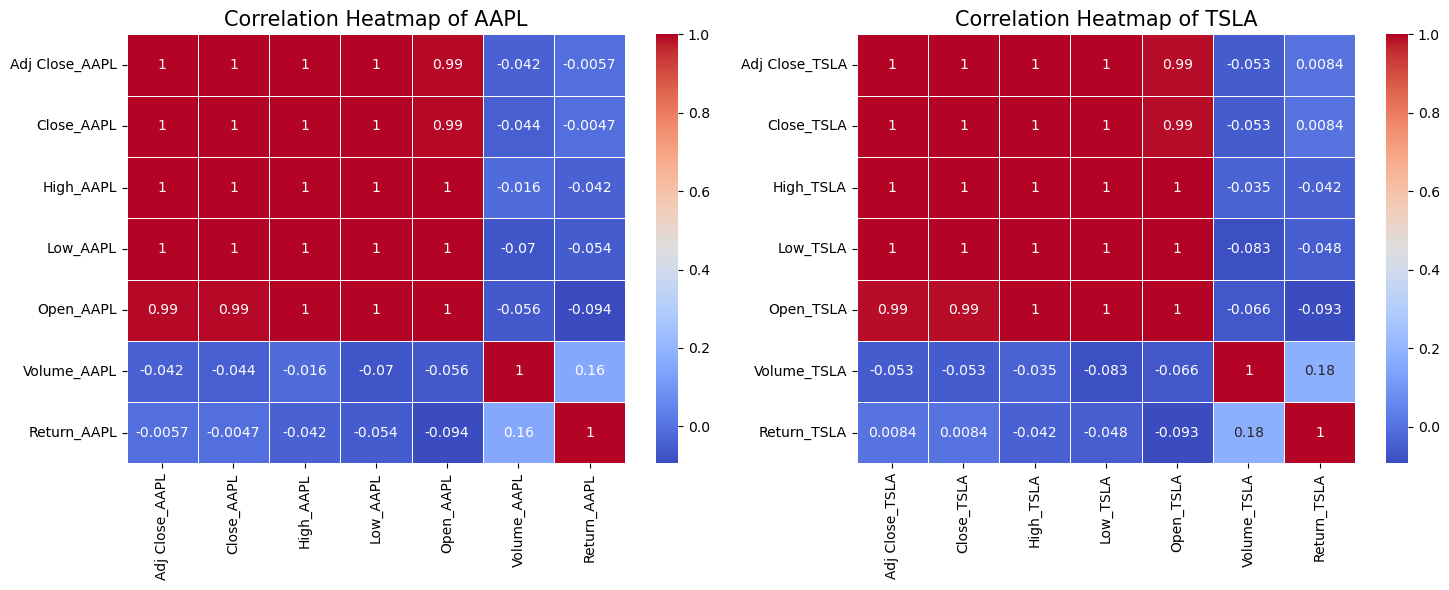

In [25]:
# Step 1: Filter columns for AAPL and TSLA
aapl_columns = [col for col in equity_data.columns if 'AAPL' in col]
tsla_columns = [col for col in equity_data.columns if 'TSLA' in col]

aapl_df = equity_data[aapl_columns]
tsla_df = equity_data[tsla_columns]

# Step 2: Calculate correlation matrices
aapl_corr = aapl_df.corr()
tsla_corr = tsla_df.corr()

# Step 3: Plot heatmaps
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# AAPL Heatmap
sns.heatmap(aapl_corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[0])
ax[0].set_title('Correlation Heatmap of AAPL', fontsize=15)

# TSLA Heatmap
sns.heatmap(tsla_corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=ax[1])
ax[1].set_title('Correlation Heatmap of TSLA', fontsize=15)

# Show plot
plt.tight_layout()
plt.show()